In [5]:
# Iman Wahle and Jenna Kahn 

# this notebook runs DBSCAN on a number of our 'standard' datasets and shows that it performs as well as Kmeans on that data (with appropriate parameter selection)

# also some guidelines on how to do parameter selection effectively? 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import compare
import warnings
from tensorflow.keras.datasets import mnist
from sklearn.manifold import TSNE

from visual_bars.generate_visual_bars_data import VisualBarsData
from cfl.density_estimation_methods.condExpCNN import CondExpCNN 
from cfl.dataset import Dataset
from cfl.util.data_processing import one_hot_encode

In [3]:
# # paths
# base_path = '/Users/imanwahle/Desktop/cfl/cfl/cluster_methods/compare_methods'
base_path = '/Users/jkahn/Documents/Schmidt/cfl/cfl/cluster_methods/compare_methods'

DATA_PATH = os.path.join(base_path, 'data')
if not os.path.isdir(DATA_PATH): 
    os.mkdir(DATA_PATH)
RESULTS_PATH = os.path.join(base_path, 'results')
FIG_PATH = os.path.join(base_path, 'figures')

In [4]:
# first, we must package a few datasets in the appropriate format

# constants
n_samples = 5000
random_state = 42

# generate sklearn blob data
data0 = datasets.make_blobs(n_samples=n_samples, random_state=8)
data1 = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5],  random_state=random_state)

# let's also include some MNIST data for high dimensionality!
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1]*train_X.shape[2]))

# we only want n_samples points from mnist for now
idx = np.random.choice(range(train_X.shape[0]), n_samples)
data2 = [train_X[idx,:], train_y[idx,]]


In [10]:
# visual bars data 

# CDE params for vis_bars datasets
CNN_params = { # parameters for model creation
                    'filters'         : [32, 16],
                    'input_shape'     : (10, 10, 1),
                    'kernel_size'     : [(3, 3)] *2,
                    'pool_size'       : [(2, 2)] *2,
                    'padding'         : ['same'] *2,
                    'conv_activation' : ['softmax', 'softmax'],
                    'dense_units'     : 16,
                    'dense_activation' : 'softmax',
                    'output_activation': 'softmax',

                    # parameters for training
                    'batch_size'  : 32,
                    'n_epochs'    : 40,
                    'optimizer'   : 'adam',
                    'opt_config'  : {},
                    'verbose'     : 2,
                    'weights_path': None,
                    'loss'        : 'mean_squared_error',
                    'show_plot'   : True,
                    'standardize' : False,
                    'best'        : True,
                }

def get_vb_data(n_samples, noise_lvl, random_state):
    vb_data = VisualBarsData(n_samples=n_samples, noise_lvl=noise_lvl, set_random_seed=random_state)
    X = vb_data.getImages()
    pyx_gt = vb_data.getGroundTruth()
    Y = vb_data.getTarget()
    return X, pyx_gt, Y

Epoch 1/40
118/118 - 2s - loss: 0.2480 - val_loss: 0.2501
Epoch 2/40
118/118 - 1s - loss: 0.2474 - val_loss: 0.2486
Epoch 3/40
118/118 - 1s - loss: 0.2375 - val_loss: 0.2269
Epoch 4/40
118/118 - 1s - loss: 0.2015 - val_loss: 0.1895
Epoch 5/40
118/118 - 1s - loss: 0.1718 - val_loss: 0.1710
Epoch 6/40
118/118 - 1s - loss: 0.1599 - val_loss: 0.1637
Epoch 7/40
118/118 - 1s - loss: 0.1553 - val_loss: 0.1609
Epoch 8/40
118/118 - 1s - loss: 0.1527 - val_loss: 0.1593
Epoch 9/40
118/118 - 1s - loss: 0.1516 - val_loss: 0.1583
Epoch 10/40
118/118 - 1s - loss: 0.1507 - val_loss: 0.1595
Epoch 11/40
118/118 - 1s - loss: 0.1500 - val_loss: 0.1580
Epoch 12/40
118/118 - 1s - loss: 0.1494 - val_loss: 0.1573
Epoch 13/40
118/118 - 1s - loss: 0.1493 - val_loss: 0.1564
Epoch 14/40
118/118 - 1s - loss: 0.1482 - val_loss: 0.1583
Epoch 15/40
118/118 - 1s - loss: 0.1484 - val_loss: 0.1555
Epoch 16/40
118/118 - 1s - loss: 0.1473 - val_loss: 0.1553
Epoch 17/40
118/118 - 1s - loss: 0.1470 - val_loss: 0.1539
Epoch 

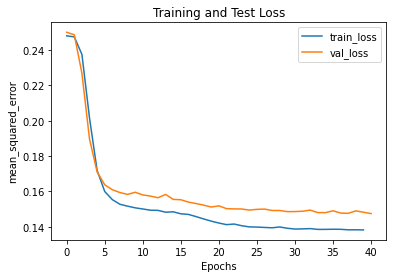

Loading parameters from  tmp_checkpoints/best_weights


In [11]:
# # visual bars, no noise, CDE output
X, pyx_gt, Y = get_vb_data(n_samples, 0.0, random_state)

# format data for CDE training
X = np.expand_dims(X, -1)
Y = one_hot_encode(Y, unique_labels=[0,1])

data_info = {'X_dims': X.shape,
             'Y_dims': Y.shape,
             'Y_type': 'categorical'}

cde = CondExpCNN(data_info, CNN_params)

vb_data = Dataset(X, Y)
results = cde.train(vb_data)
pyx = results['pyx']

# package data
vb_data0 = [pyx, pyx_gt]

Epoch 1/40
118/118 - 2s - loss: 0.2512 - val_loss: 0.2487
Epoch 2/40
118/118 - 1s - loss: 0.2474 - val_loss: 0.2466
Epoch 3/40
118/118 - 1s - loss: 0.2379 - val_loss: 0.2265
Epoch 4/40
118/118 - 1s - loss: 0.2084 - val_loss: 0.1934
Epoch 5/40
118/118 - 1s - loss: 0.1845 - val_loss: 0.1791
Epoch 6/40
118/118 - 1s - loss: 0.1733 - val_loss: 0.1711
Epoch 7/40
118/118 - 1s - loss: 0.1666 - val_loss: 0.1660
Epoch 8/40
118/118 - 1s - loss: 0.1621 - val_loss: 0.1621
Epoch 9/40
118/118 - 1s - loss: 0.1589 - val_loss: 0.1611
Epoch 10/40
118/118 - 1s - loss: 0.1571 - val_loss: 0.1578
Epoch 11/40
118/118 - 1s - loss: 0.1557 - val_loss: 0.1565
Epoch 12/40
118/118 - 1s - loss: 0.1544 - val_loss: 0.1552
Epoch 13/40
118/118 - 1s - loss: 0.1534 - val_loss: 0.1547
Epoch 14/40
118/118 - 1s - loss: 0.1524 - val_loss: 0.1534
Epoch 15/40
118/118 - 1s - loss: 0.1518 - val_loss: 0.1523
Epoch 16/40
118/118 - 1s - loss: 0.1507 - val_loss: 0.1515
Epoch 17/40
118/118 - 1s - loss: 0.1498 - val_loss: 0.1522
Epoch 

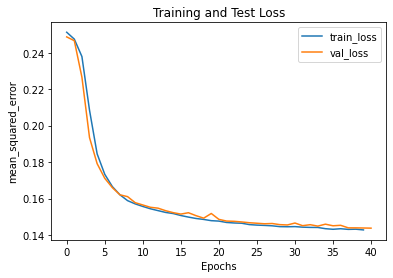

Loading parameters from  tmp_checkpoints/best_weights


In [12]:
# # visual bars, 3% noise, CDE output
from cfl.density_estimation_methods.condExpCNN import CondExpCNN 
from cfl.dataset import Dataset

X, pyx_gt, Y = get_vb_data(n_samples, 0.03, random_state)

# format data for CDE training
X = np.expand_dims(X, -1)
Y = one_hot_encode(Y, unique_labels=[0,1])

data_info = {'X_dims': X.shape,
             'Y_dims': Y.shape,
             'Y_type': 'categorical'}

cde = CondExpCNN(data_info, CNN_params)

vb_data = Dataset(X, Y)
results = cde.train(vb_data)
pyx = results['pyx']

# package data
vb_data03 = [pyx, pyx_gt]

In [5]:
data_names = ['blobs_const', 'blobs_vard', 'mnist', 'vb_data_no_noise', 'vb_data_noise']


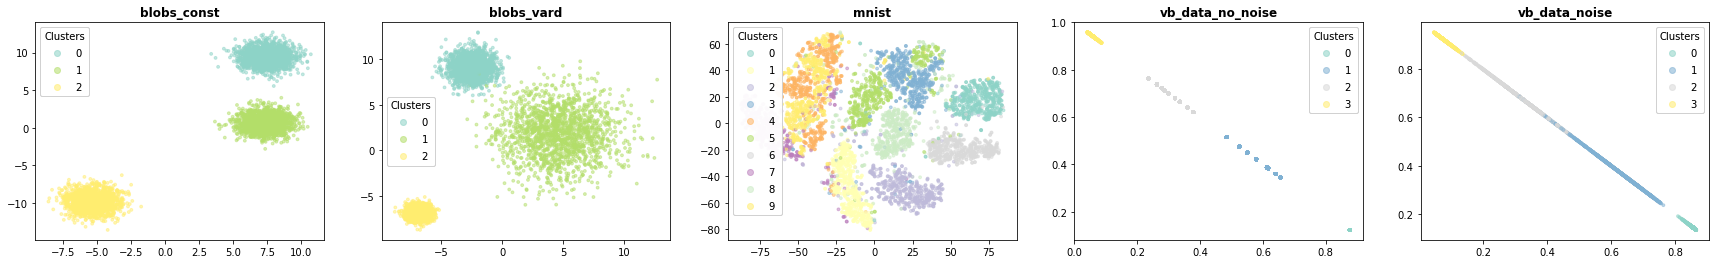

In [14]:
# save in expected format
datas = [data0, data1, data2, vb_data0, vb_data03]

for dataset,data_name in zip(datas, data_names):
    os.mkdir(os.path.join(DATA_PATH, data_name))
    np.save(os.path.join(DATA_PATH, data_name, 'data_to_cluster.npy'), dataset[0])
    np.save(os.path.join(DATA_PATH, data_name, 'true_labels.npy'), dataset[1])

# visualize data
fig,axs = plt.subplots(1, len(datas), figsize=(len(datas)*6,4))
for dataset,data_name,ax in zip(datas, data_names, axs.ravel()):

    # get embedding
    if dataset[0].shape[1] > 2:
        embedding = compare.get_embedding(DATA_PATH, data_name)
    else:
        embedding = dataset[0]
    
    # make subplot
    compare._scatter_helper(ax, embedding, dataset[1], data_name, subscript=None)

plt.show()

In [6]:
# setup arguments for comparison
# data_path_list = ['blobs_const', 'blobs_vard', 'mnist', 'no_noise_vbdata', 'noise_vbdata']

method_list = ['DBSCAN', 'KMeans']
params = [  {'eps' : (1.0, 2.0, 10), 'min_samples' : (1,6,5)},
            {'n_clusters' : (2,15,13)}
        ]

In [10]:
# run comparison
with warnings.catch_warnings(): # warnings from CFL make things messy right now
    warnings.simplefilter("ignore")
    compare.main(DATA_PATH, data_names, method_list, params, RESULTS_PATH)

0it [00:00, ?it/s]
DATASET: blobs_const, METHOD: DBSCAN
1it [00:04,  4.90s/it]
100%|██████████| 5000/5000 [00:00<00:00, 33262.31it/s]
2it [00:12,  6.30s/it]
100%|██████████| 5000/5000 [00:00<00:00, 37447.40it/s]
3it [00:17,  5.66s/it]
100%|██████████| 5000/5000 [00:00<00:00, 24036.84it/s]
4it [00:21,  5.15s/it]
100%|██████████| 5000/5000 [00:00<00:00, 34148.95it/s]
5it [00:25,  4.80s/it]
100%|██████████| 5000/5000 [00:00<00:00, 36522.96it/s]
6it [00:30,  4.85s/it]
100%|██████████| 5000/5000 [00:00<00:00, 37851.31it/s]
7it [00:35,  4.78s/it]
100%|██████████| 5000/5000 [00:00<00:00, 17947.16it/s]
8it [00:40,  4.85s/it]
100%|██████████| 5000/5000 [00:00<00:00, 30472.21it/s]
9it [00:45,  5.06s/it]


ValueError: could not broadcast input array from shape (5000,2) into shape (5000,4)

In [15]:
from importlib import reload
reload(compare)
compare.compare_scatter_plots(DATA_PATH, RESULTS_PATH, data_names, method_list, subfigsize=(6,4), fig_path=FIG_PATH)

dataset is  blobs_const
dataset_path passed in is /Users/jkahn/Documents/Schmidt/cfl/cfl/cluster_methods/compare_methods\data\blobs_const
results path i s /Users/jkahn/Documents/Schmidt/cfl/cfl/cluster_methods/compare_methods\results
dataset is  blobs_const
method is compare_methods\results\blobs_const\DBSCAN


FileNotFoundError: [Errno 2] No such file or directory: '/Users/jkahn/Documents/Schmidt/cfl/cfl/cluster_methods/compare_methods\\results\\blobs_const\\compare_methods\\results\\blobs_const\\DBSCAN\\tuning_pred_labels.npy'

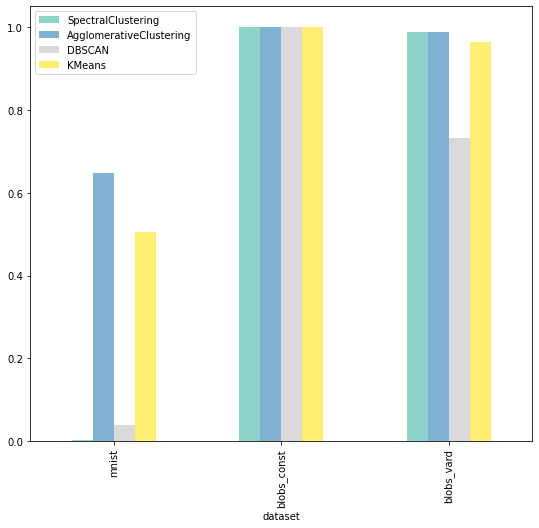

In [26]:
reload(compare)
compare.compare_best_gt_scores(RESULTS_PATH, fig_path=FIG_PATH)

In [ ]:
# TODO
- param search over strings (distance metrics)
- collect run times for each dataset/method
- run on cde output